# DF: What are these texts about?

In many situations, we want our computers to summarize a big set of texts. Perhaps we don't want to go into detail, but we wish to know what people are talking about. This is a great source of information, because it allows something called *opinion mining*: are people talking positively about an artist? About a company? About the government?

Also, if you are collecting feedback, you might want to find out what are the main points your customers are complaining about.

We will get started by downloading a dataset with news from Kaggle:

In [1]:
import kagglehub
import os
import pandas as pd
from pathlib import Path

path = Path(kagglehub.dataset_download("gpreda/bbc-news"), verify=False)
print("Path to dataset files:", path)
print("Files in the dataset:", os.listdir(path))
df = pd.read_csv(path / os.listdir(path)[0])
print(f"Number of news: {len(df)}")
df.head()

Path to dataset files: /Users/luccahiratsuca/.cache/kagglehub/datasets/gpreda/bbc-news/versions/1007
Files in the dataset: ['bbc_news.csv']
Number of news: 42115


,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [33]:
df.columns

Index(['title', 'pubDate', 'guid', 'link', 'description'], dtype='object')

Ok, so we have over 40000 news downloaded from BBC here.

We are going to work with the question: what was being said about the war in Ukraine?

## Exercise 1: data preparation

First of all, we will need to find all news articles that talk about Brazil.

We will need a regular expression that matches all of Brazil, Brazilian, and so on, and then we can use Pandas' built in methods to filter out the news:

In [11]:
import re
regular_expression = r'Brazil\w*' # Change for something that matches references to ukraine
df_filt = df[df['description'].str.contains(regular_expression, case=False)]
print(len(df_filt))
df_filt.head()

138


,title,pubDate,guid,link,description
744,Evangelicalism & Brazil: The religious movemen...,"Tue, 22 Mar 2022 00:01:04 GMT",https://www.bbc.co.uk/sport/football/60483820,https://www.bbc.co.uk/sport/football/60483820?...,Evangelicalism within Brazil's national footba...
1392,Brazil at work: Black and held back,"Tue, 05 Apr 2022 23:52:18 GMT",https://www.bbc.co.uk/news/world-latin-america...,https://www.bbc.co.uk/news/world-latin-america...,Brazil has one of the world's largest black po...
1430,Brazil at work: Black and held back,"Tue, 05 Apr 2022 23:52:18 GMT",https://www.bbc.co.uk/news/world-latin-america...,https://www.bbc.co.uk/news/world-latin-america...,Brazil has one of the largest black and mixed ...
2069,Rio carnival: Brazil holds first Rio de Janeir...,"Sun, 24 Apr 2022 01:49:24 GMT",https://www.bbc.co.uk/news/world-latin-america...,https://www.bbc.co.uk/news/world-latin-america...,Parades fill the streets of Brazil's Rio de Ja...
2154,Brazil Carnival: 'Bolsonaro' dancer turned int...,"Mon, 25 Apr 2022 12:12:53 GMT",https://www.bbc.co.uk/news/world-latin-america...,https://www.bbc.co.uk/news/world-latin-america...,Brazil's famous Carnival returned this year fo...


## Exercise 2: Document Frequency

First, we will identify all words that exist in our texts. One way to do such thing is to concatenate all headlines and descriptions in a single text file, then separate all words using RegEx, and then use the `set()` function to identify each word:

In [ ]:
all_descriptions = ' '.join(list(df_filt['description']))
all_headlines = ' '.join(list(df_filt['title']))
all_texts = all_descriptions + ' ' + all_headlines
all_words = re.findall(r'\b\w+\b', all_texts) # remove ponctuation
all_unique_words = set(all_words)
print(len(all_unique_words))

1283


In [56]:
all_descriptions

'Evangelicalism within Brazil\'s national football team has been on the rise, mirroring a wider trend across the country. Brazil has one of the world\'s largest black populations but black people only hold 6% of managerial posts. Brazil has one of the largest black and mixed race populations but black people only hold 6% of managerial posts. Parades fill the streets of Brazil\'s Rio de Janeiro for the first carnival since the pandemic began. Brazil\'s famous Carnival returned this year for the first time since the Covid pandemic. Brazil\'s famous Carnival returned this year for the first time since the Covid pandemic. The Hollywood star urged Brazil\'s youth to vote in October\'s elections to save the Amazon. The former Brazilian president says he wants to unite the country and defend its democracy. Evangelical Christian women of colour were kingmakers in Brazil\'s last presidential election and look set to be so again. Aston Villa agree a deal to sign Brazil centre-back Diego Carlos f

The underlying theory of opinion mining is that words that convey opinion (or: that convey the "common sense" of a dataset) appear in more documents. The number of documents in which a word appears is called *document frequency*.

We could build a dictionary in which keys are the words in our vocabulary and the values are the number of documents that word appears in. Remember, this is not the same as counting how many times that word was used: if the words appears in two documents, its frequency should be 2; however, if it appears twice in a single document, then its frequency should be 1.

After that, we can divide the counts by the number of documents so your dictionary contains the probability that a randomly selected document contains each word (or: $P(w_n | d)$).

We could study fast algorithms to calculate document frequency, but, instead, we are going to use the ready-made `CountVectorizer` class from `sklearn`.

CountVectorizer creates a $X \in \mathbb{R}^{N \times V}$ matrix where $N$ is the number of documents in the collection and $V$ is the vocabulary size. The element $x_{n,v}$ is $1$ if word $v$ appears in document $n$, and $0$ otherwise.

CountVectorizer also creates a `vocabulary_` property containing a dictionary that maps words to their indexes in the matrix.

We can use that to create a dictionary mapping words to their document frequency. 

The final dictionary should look like:

    { 
      'word1' : number_of_documents_word1_appears/total_number_of_documents,
      'word2' : number_of_documents_word2_appears/total_number_of_documents,
      ...
      'wordn' : number_of_documents_wordn_appears/total_number_of_documents,
    }

HINT: use `np.mean(x ,axis=0)` to calculate the mean value of a matrix along the rows.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df_filt['description'])


# Does the word 'the' appear in document 3?
#X[3, vectorizer.vocabulary_['the']]

# Continue with your solution
doc_freq_matrix = X.mean(axis=0)
doc_freq = {
    word: doc_freq_matrix[0, vectorizer.vocabulary_[word]]
    for word in vectorizer.vocabulary_
}

**Understanding better with example:**

  ``` python
  import numpy as np
  from sklearn.feature_extraction.text import CountVectorizer

  # 🔹 Conjunto de documentos (exemplo)
  documents = [
      "I love cats and dogs",
      "Cats are great pets",
      "I have a dog",
      "Dogs are loyal"
  ]

  # 🔹 Matrix - Count of words
  vectorizer = CountVectorizer(binary=True)  # binary=True faz com que seja 1 se a palavra estiver no documento
  X = vectorizer.fit_transform(documents)  # Transforma os textos em matriz binária

  # 🔹 Obtendo o vocabulário (palavra → índice)
  vocab = vectorizer.vocabulary_

  # 🔹 Calculando a frequência do documento
  doc_freq = np.mean(X.toarray(), axis=0)  # Calcula a média ao longo dos documentos

  # 🔹 Criando o dicionário de document frequency
  doc_freq_dict = {word: doc_freq[idx] for word, idx in vocab.items()}

  # 🔹 Exibindo os resultados
  print("Frequência nos documentos (Document Frequency):")
  print(doc_freq_dict)
  ```

**Output:**
```
{
  'i': 0.5,
  'love': 0.25,
  'cats': 0.5,
  'and': 0.25,
  'dogs': 0.5,
  'are': 0.5,
  'great': 0.25,
  'pets': 0.25,
  'have': 0.25,
  'a': 0.25,
  'dog': 0.5,
  'loyal': 0.25
}
```

## Exercise 3: stopwords

Now, see some useful manipulations. We can convert our dictionary to a Pandas dataframe and plot some values as a barplot:

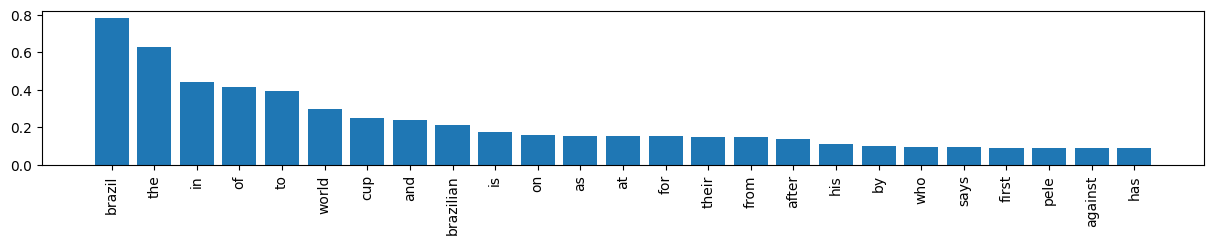

In [38]:
import matplotlib.pyplot as plt
import pandas as pd 
df_vocabulary = pd.DataFrame(doc_freq.items(), columns=['word', 'frequency'])
df_vocabulary = df_vocabulary.sort_values(by='frequency', ascending=False)
df_vocabulary.head()
plt.figure(figsize=(15,2))
plt.bar(df_vocabulary.iloc[0:25]['word'], df_vocabulary[0:25]['frequency'])
plt.xticks(rotation=90)
plt.show()

### Meaning of `stop_words`:

Note that there are some words that are so common that they don't tell us much about the problem, like "the" and "a". These types of words are usually avoided by using a manually-curated list of special words called "stopwords". We can inform our vectorizer to use a pre-made list of stop words by using the `stop_words` parameter:

    vectorizer = CountVectorizer(binary=True, stop_words='english')

Now, go ahead and incorporate the parameters, and run the code above again. What changes do you see in the plot?

According to this plot, what could be said about the news on Ukraine?

In [39]:
vectorizer = CountVectorizer(binary=True, stop_words='english')

X = vectorizer.fit_transform(df_filt['description'])

doc_freq_matrix = X.mean(axis=0)

doc_freq = {
    word: doc_freq_matrix[0, vectorizer.vocabulary_[word]]
    for word in vectorizer.vocabulary_
}

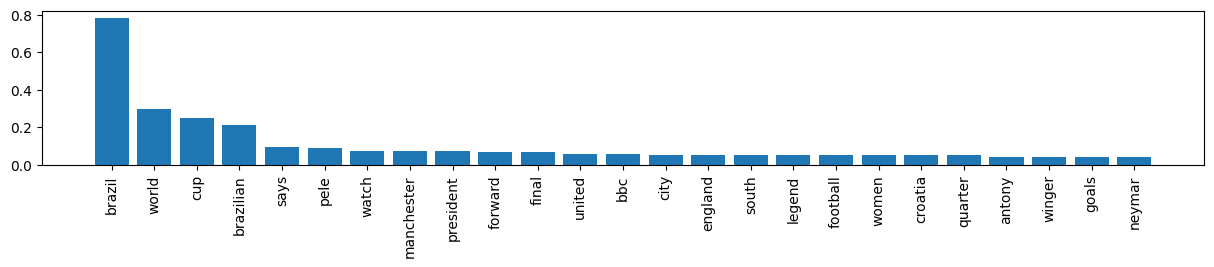

In [40]:
df_vocabulary = pd.DataFrame(doc_freq.items(), columns=['word', 'frequency'])
df_vocabulary = df_vocabulary.sort_values(by='frequency', ascending=False)
df_vocabulary.head()
plt.figure(figsize=(15,2))
plt.bar(df_vocabulary.iloc[0:25]['word'], df_vocabulary[0:25]['frequency'])
plt.xticks(rotation=90)
plt.show()

## Exercise 4: lemmatization

If everything went well, you should be seeing "say" and "says" with high document frequencies. However, they carry very similar information - hence they should be together.

One way to deal with that is to remember that words are composed of a stem and a suffix (like "liquid", "liquidification", "liquidize", and so on). The process of removing the suffix is called "stemming". There are some interesting processes to perform stemming.

Another approach is to use lemmatization. In lemmatization, each word is changed by its dictionary entry. It is a great process to remove plurals, for example.

There are stemmers and lemmatizers implemented in the NLTK library:

In [41]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download WordNet data
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmatized_word = lemmatizer.lemmatize("says")

stemmed = PorterStemmer()
stemmed_word = stemmed.stem("says")
print(lemmatized_word, stemmed_word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/luccahiratsuca/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


say say


However, NLTK's implementation operates in a single word.

Make functions to apply stemming to each word in the dataset, and then run your code again. After that, try it with lemmatization. Which one is clearer?

In [66]:
def lematizar_texto(texto):
    palavras = re.findall(r'\w+', texto)
    palavras_lematizadas = []
    for p in palavras:
        pl = lemmatizer.lemmatize(p)
        palavras_lematizadas.append(pl)
    return ' '.join(palavras_lematizadas)

df_filt['lematizados'] = df_filt['description'].apply(lematizar_texto)

/var/folders/0b/t7v75s011nxd0q97zmc5_fm80000gn/T/ipykernel_64340/3809336576.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['lematizados'] = df_filt['description'].apply(lematizar_texto)


## Exercise 5: the inverted index

You might have figured out by now that searching for words in a large collection is very inneficient. To avoid such searches, many databases implement a data structure called an "inverted index".

The inverted index is essentially a dictionary whose key is a word from the vocabulary, and whose value is a list (or set) of references to documents that contain that word.

As an example, the inverted index below:

    {
        'brazil' : [0, 1, 2],
        'argentina' : [2, 3]
    }

means that "brazil" appears in documents 0, 1, and 2, while "argentina" appears in documents 2 and 3.

You might want to stem/lemmatize the words before implementing the inverted index.

(a) Complete the function below to generate an inverted index for a news dataframe, which will allow searching among news based on keywords. HINT: use `CountVectorizer` to save yourself some time!

(b) Use your inverted index to search for news documents that contain "brazil" AND "president". What does the DF distribution say in this case?

(c) Use your inverted index to search for news documents that contain "brazil" BUT DO NOT CONTAIN "football" or "soccer". How is the DF distribution in this case?

In [44]:
from typing import Dict

def make_inverted_index_from_df(df : pd.DataFrame) -> Dict:
    return {}

## Exercise 6: Topic modelling

Remember that our documents are now represented in a $X \in \mathbb{R}^{D \times V}$ matrix. In this matrix, each word is completely independent from each other. However, we know that some words are more likely to appear together in real texts.

These groups of words that appear together are called "topics". The act of finding topics is called "topic modelling". One of the current state-of-the-art ideas for topic modelling is called [Latent Dirichlet Allocation](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf), or LDA.

LDA is a fast technique that assumes $X$ contains discrete counts of words in each document, and then calculates an approximation:

$$
X \approx B A,
$$

where $B \in \mathbb{R}^{D \times T}$ and $A \in \mathbb{R}^{T \times V}$, and $T$ is an arbitrarily chosen number of topics. Essentially, $B$ informs how much each document participates in each topic, and $A$ informs how much each word in the vocabulary participates in each topic.

The code to use LDA adequately is a bit tricky.

Here is one example. Interpret the outputs, and then try to change the number of topics.

Which matrix ($B$ or $A$) is represented by `lda_model.components_`?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        stop_words='english',
        max_df=0.7,
        min_df=2,
    )),
    ('lda',
     LatentDirichletAllocation(
         n_components=10,
         max_iter=300,
         random_state=42,
     )),
])

pipeline.fit(df_filt['description'])

lda_output = pipeline.transform(df_filt['description'])
lda_model = pipeline.named_steps['lda']
feature_names = pipeline.named_steps['vectorizer'].get_feature_names_out()

# Print the most prominent words in each topic
# Print the number of documents whose most prominent topic is this one
most_prominent_topic = lda_output.argmax(axis=1)
for topic_idx, topic in enumerate(lda_model.components_):
    num_documents = (most_prominent_topic == topic_idx).sum()
    print(f"Topic {topic_idx} ({num_documents} documents):")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

Topic 0 (12 documents):
president black world brazilian country football people record largest managerial
Topic 1 (12 documents):
world cup south late beat korea years finals won dominant
Topic 2 (15 documents):
manchester united antony winger deal sign city brazilian allegations sport
Topic 3 (12 documents):
cup world quarter croatia watch final victory england neymar forward
Topic 4 (15 documents):
brazilian butt lift year undergoing webb died alice 33 club
Topic 5 (15 documents):
world cup says women final football team games role tears
Topic 6 (16 documents):
election presidential crisis people cost living new amazon state issue
Topic 7 (11 documents):
brazilian gabriel surfer medina paris imaginations globe striking captured image
Topic 8 (19 documents):
pele brazilian forward watch cup world group indigenous match goals
Topic 9 (11 documents):
world cup mcnulty phil largest bbc england richarlison wembley defeat


## Exercise 7: a solution with LLMs

So far, we have learned how to use classic NLP techniques to get a gist of the news. However, large language models (LLMs) seem to be the new state of the art for such. 

Well, we would like a summary of all news related to Brazil. Our classical methods are highly biased by the fact that most news are about football - let's see what LLMs can do for us here!

For such, we will use Google Gemni, which has a great free tier that is just enough for our learning purposes. Go to https://aistudio.google.com/ and get yourself an API key. Then, add the key to the `.env` file in your system.

Check how prompting works - it is essentially like using ChatGPT.

1. Can you control the prompts so that summaries are more verbose or less verbose?
1. What happens if you don't provide the model with the news you want a summary of - maybe changing the prompt to "give me a summary of news in Brazil from 2022 to 2024"?
1. What happens if you ask a direct question?
1. How does these summaries compare with the topics generated by LDA?

In [59]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
load_dotenv()
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
#GEMINI_API_KEY = # Go to https://aistudio.google.com/ to get a key. DO NOT commit your key to the repository!

# Start the use of the API
genai.configure(api_key=GEMINI_API_KEY)
model = genai.GenerativeModel(model_name="gemini-1.5-flash")

# Make our prompt here
news = '\n\nAnother news '.join(list(df_filt['description']))
prompt = f"I have these pieces of news: {news}. Can you summarize them for me?"

# Use our prompt
response = model.generate_content(prompt)

# Print our response
print(response.text)

These news items cover a wide range of topics related to Brazil, including:

**Politics and Society:**

* **Presidential Elections:**  The 2022 Brazilian presidential election was a major focus, with coverage of candidates' campaigns, the election results (Lula's victory),  voter anxieties, and the subsequent storming of the Congress by Bolsonaro supporters.  The influence of Evangelical Christians, particularly women of color, in the election is highlighted.  The US's keen interest in the outcome is also noted.
* **Social Issues:**  Brazil's racial inequality is addressed, showing the underrepresentation of Black people in managerial positions.  The cost of living crisis and its impact on the population, including extreme measures taken by some to survive, are discussed.  The hunger crisis and community responses are also mentioned.  The ongoing debate surrounding abortion is noted.
* **Amazon Rainforest:** The future of the Amazon rainforest is tied to the presidential election resul

## Exercise 8: combining everything

In general, the more we provide LLMs with specific information in the prompt, the better is its output (also, using less data can decrease our cloud costs...). Based on the code above, make a proof-of-concept code (probably within this notebook?) that first uses LDA to roughly identify topics, and then uses the LLM to make a summary of documents within a topic chosen by the user.


In [90]:
filter_topic = most_prominent_topic == 4
df_topic = df_filt[filter_topic]
len(df_topic)

df_topic['description']

2154     Brazil's famous Carnival returned this year fo...
2195     Brazil's famous Carnival returned this year fo...
10477    The Brazilian president-elect attracts huge em...
17706    The aircraft is reported to have links to a Br...
19354    Brazilian winger Willian rejoins Fulham and si...
20047    Brazil midfielder Fabinho completes a move to ...
22222    A so-called Brazilian butt-lift is the fastest...
25262    The US pop star says she is putting safety fir...
25331    The US pop star says she is putting safety fir...
31398    Brazilian workers face degrading conditions to...
38796    British judoka Dan Powell takes -90kg J1 silve...
39456    Alice Webb, 33, died on Tuesday morning after ...
39506    Mother-of-five Alice Webb, 33, died after repo...
40944    The Brazilian was shot when he was wrongly sus...
41135    The family of Alice Webb, 33, gather to rememb...
Name: description, dtype: object

In [91]:
news = '\n\nAnother news '.join(list(df_topic['description']))
prompt = f"I have these pieces of news: {news}. Can you summarize them for me?. Response in markdown format."

# Use our prompt
response = model.generate_content(prompt)

# Print our response
print(response.text)

# Brazil-Related News Summary

This collection of news items covers a range of topics related to Brazil:

**Culture & Events:**

* **Carnival's Return:** Brazil's Carnival celebrated its return after a Covid-19 hiatus.

**Politics & Society:**

* **President-Elect at COP27:** Brazil's president-elect drew large crowds at COP27 but faces domestic opposition.
* **Evangelical Church Link:** An aircraft is reportedly linked to a Brazilian evangelical church branch.
* **Worker Exploitation:** Brazilian workers endure harsh conditions harvesting palm wax used in various products.

**Sports:**

* **Willian's Fulham Return:** Brazilian winger Willian rejoined Fulham on a one-year contract.
* **Fabinho's Saudi Move:** Brazilian midfielder Fabinho transferred to Saudi Arabian club Al-Ittihad.
* **Judo Competition:** British judoka Dan Powell won silver, losing to a Brazilian competitor.

**Health & Safety:**

* **Brazilian Butt Lift Risks:**  The Brazilian butt lift is the fastest-growing cosmet

## Minhas Notas:

### Lemmatização vs Stemming: O que são e qual a diferença?

Tanto a lemmatização quanto o stemming são técnicas de Processamento de Linguagem Natural (NLP) usadas para reduzir palavras à sua forma base.

1. 🔹 Stemming → Corta sufixos das palavras para obter uma raiz bruta. 

    O stemming usa regras simples de corte de sufixos para reduzir uma palavra à sua raiz. Ele não leva em conta o significado da palavra, então pode gerar palavras que não existem no dicionário.

    Exemplo:

    | Palavra | Stemming |
    |---------|----------|
    | running | run      |
    | better  | bet      |
    | swimming| swim     |
    | studying| study    |
    
    O stemming é mais rápido que a lemmatização, mas pode não ser tão preciso.
</br>

2. 🔹 Lemmatização → Reduz palavras à sua forma dicionarizada (ou seja, sua raiz correta, chamada lema).
    Ela usa dicionários linguísticos para encontrar o lema (forma canônica) de uma palavra.

    Exemplo:
    | Palavra | Lemmatização |
    |---------|--------------|
    | running | run          |
    | better  | good         |
    | swimming| swim         |
    | studying| study        |

    ✅ Vantagem: Gera palavras corretas e gramaticalmente coerentes.

    ❌ Desvantagem: Mais lento, pois precisa acessar dicionários.



### Topic Modeling com LDA

1. **Topic Modeling:**

    Essa é uma técnica de Processamento de Linguagem Natural (NLP) usada para encontrar grupos de palavras que frequentemente aparecem juntas em um conjunto de documentos.
    Esses grupos de palavras são chamados de tópicos.

    Exemplo:
    Se tivermos um conjunto de notícias, um modelo pode identificar que palavras como "goal", "match", "team" aparecem juntas em artigos sobre esportes, enquanto "election", "government", "policy" aparecem em artigos sobre política.

2. **LDA**

    O LDA (Latent Dirichlet Allocation) é um algoritmo probabilístico que assume que cada documento é composto por uma mistura de tópicos e que cada tópico é uma mistura de palavras.

    O LDA decompõe a matriz X (documentos x palavras) em duas matrizes:

    $$
    X \approx B \times A
    $$


    Onde:

    - X → Matriz original de contagem de palavras (D × V)
    - B → Matriz Documentos x Tópicos (D × T)
    - A → Matriz Tópicos x Palavras (T × V)
    - T → Número arbitrário de tópicos escolhidos


    🔹 Interpretação das matrizes:

    - B (document-topic matrix) → Diz quanto cada documento pertence a cada tópico.
    - A (topic-word matrix) → Diz quanto cada palavra pertence a cada tópico.

---
**Falando de código e exemplo:**

```python

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 🔹 Conjunto de documentos de exemplo
documents = [
    "I love playing football",
    "Football is a great sport",
    "The government passed a new law",
    "Elections will happen next year",
    "I enjoy watching movies",
    "Movies are a great way to relax"
]

# 🔹 Criando a matriz de contagem de palavras
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# 🔹 Criando o modelo LDA com 2 tópicos
lda_model = LatentDirichletAllocation(n_components=2, random_state=42)
lda_model.fit(X)

# 🔹 Obtendo os tópicos e palavras mais importantes
words = np.array(vectorizer.get_feature_names_out())

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\n🔹 Tópico {topic_idx + 1}:")
    top_words = words[np.argsort(topic)[-5:]]  # Top 5 palavras mais relevantes
    print("   ", " ".join(top_words))

```

- Quanto maior o número de tópicos, mais específicos eles serão.
- Se diminuirmos o número de tópicos (`n_components=1`), ele tentará juntar tudo em um único tema.